In [ ]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

df = pd.read_csv('life_expectancy.csv')

In [ ]:
data_arr = np.array(df.iloc[:]).T[3:-1].T.astype(np.float64)

In [ ]:
new_data_arr = []
for data in data_arr:
  if np.sum(data) == np.sum(data):
    new_data_arr.append(data)

new_data_arr = np.array(new_data_arr)

In [ ]:
new_data_arr_norm = new_data_arr / np.mean(new_data_arr, axis = 0)
p = np.random.permutation(len(new_data_arr_norm))
new_data_arr_norm = new_data_arr_norm[p]

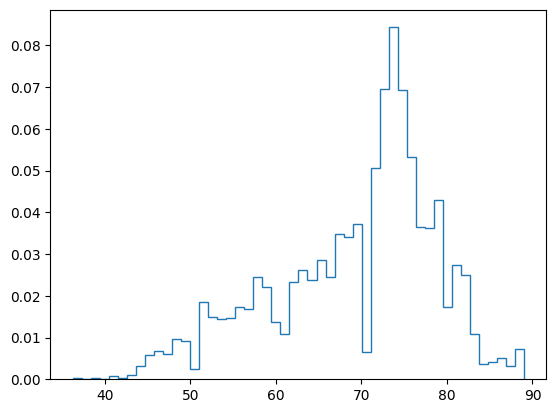

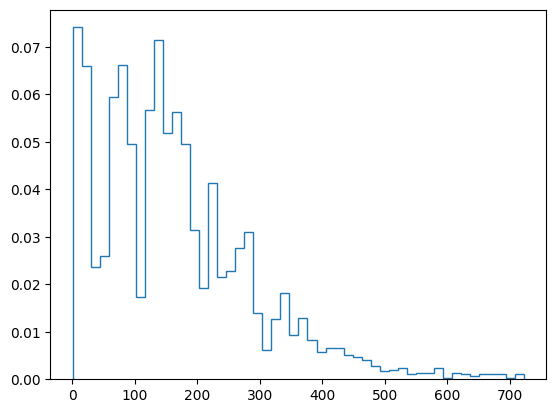

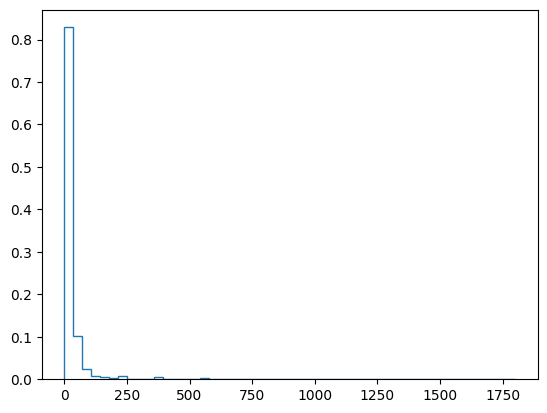

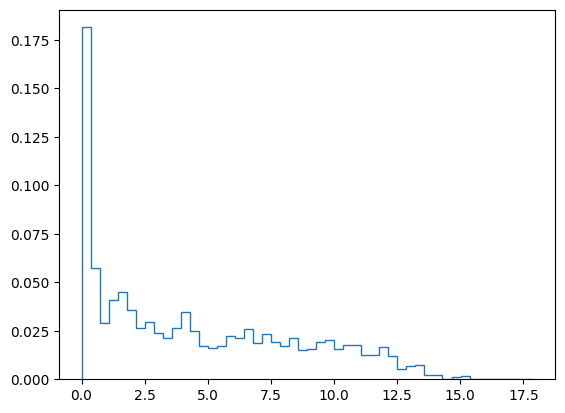

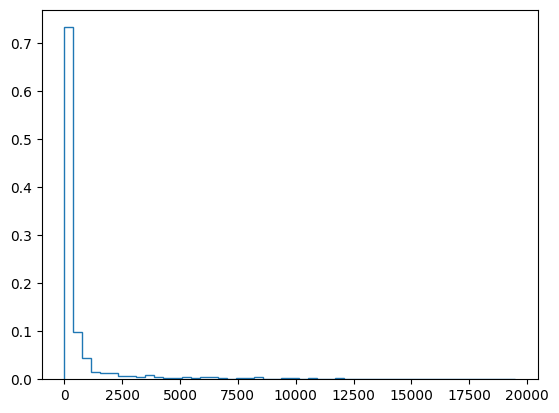

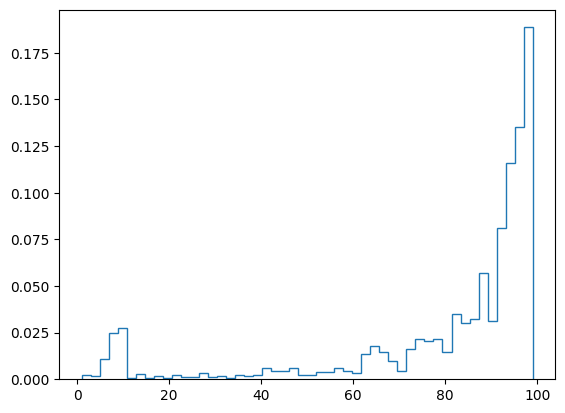

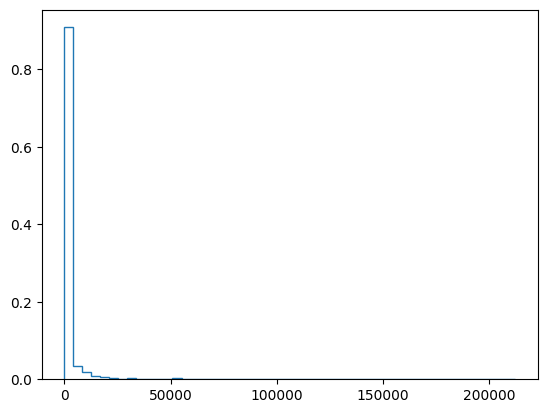

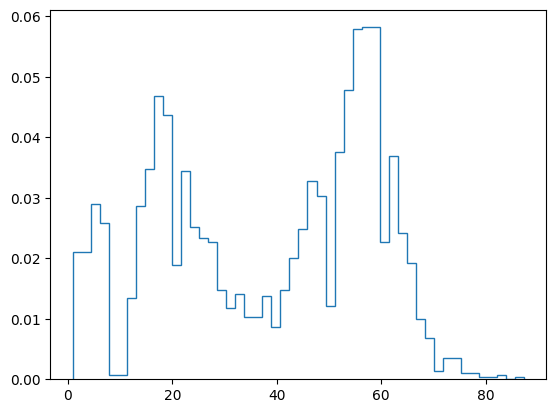

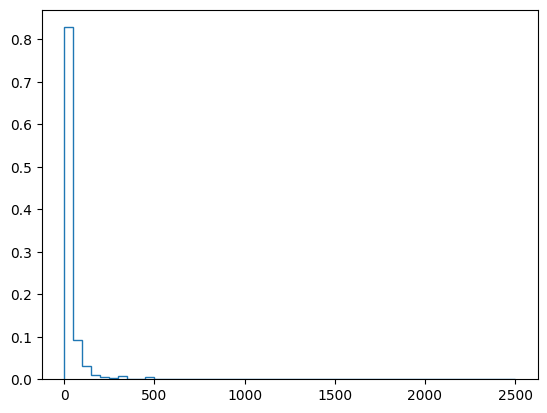

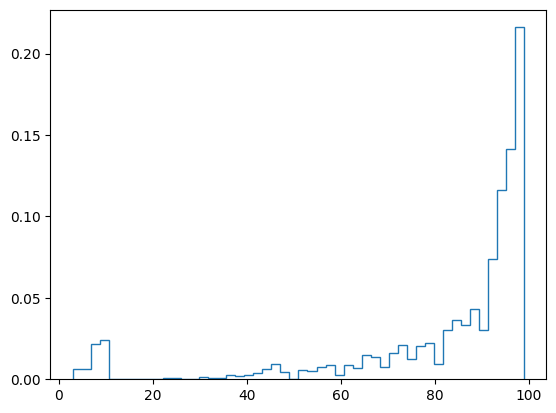

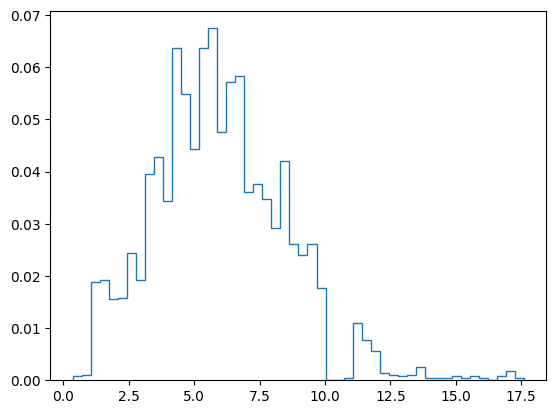

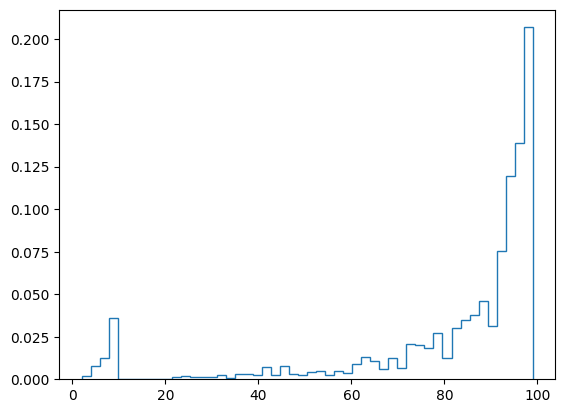

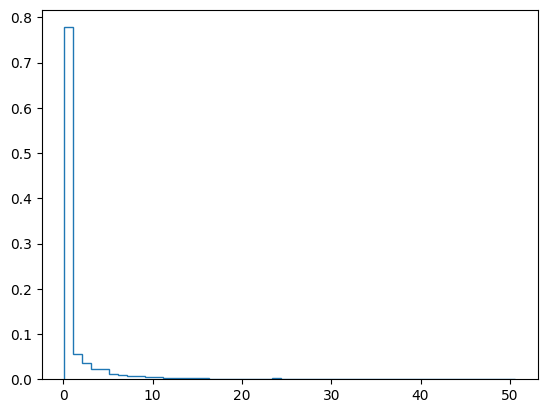

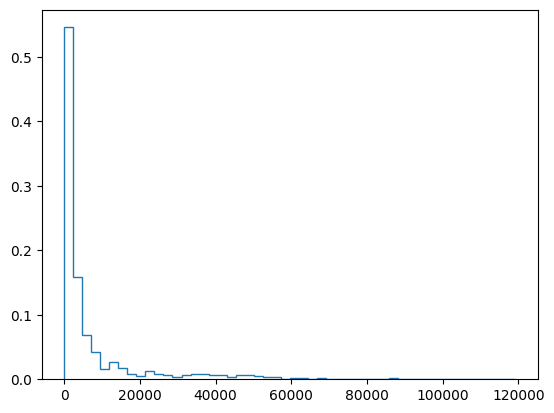

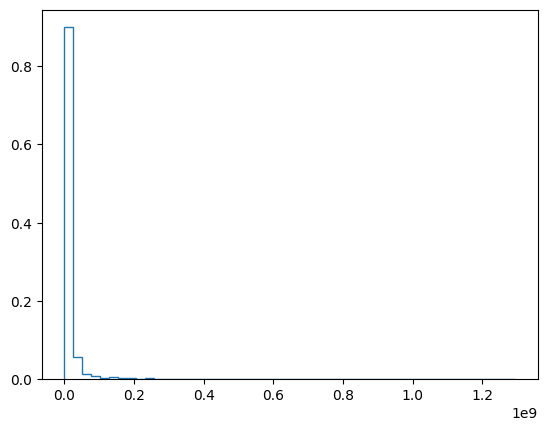

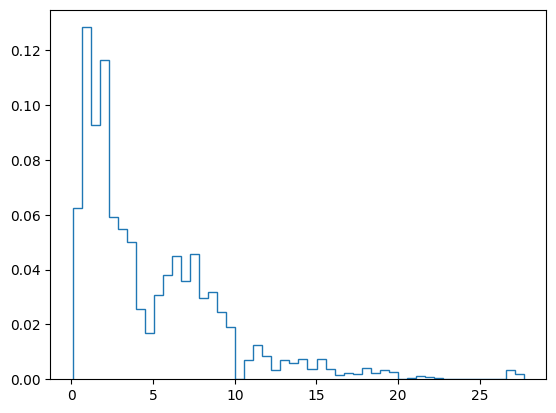

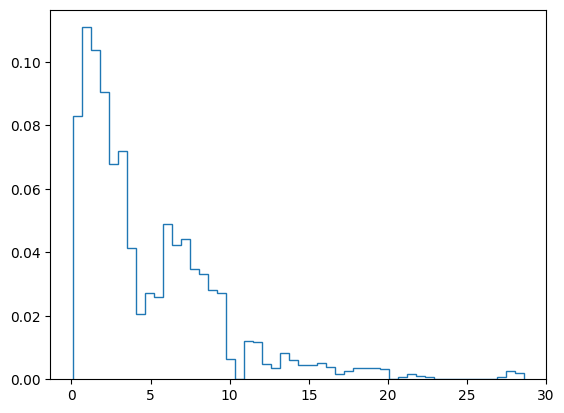

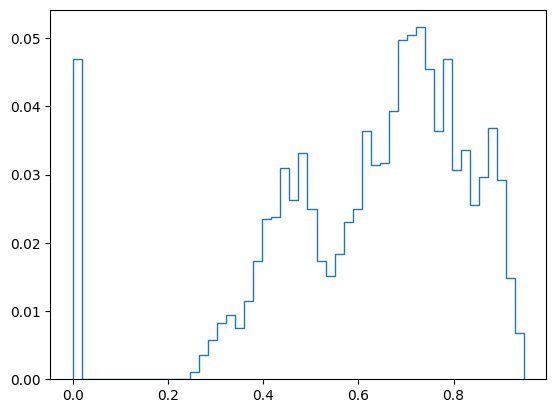

0
55.272
0
63.70399999999999
0
48.94799999999999
0
53.164
0
39.461999999999996
0
68.97399999999999
0
59.488
0
85.838
0
76.352
0
47.894
1
87.64
1
650.8
1
650.8
1
549.72
1
621.92
1
694.12
1
621.92
1
506.4
1
232.04
1
535.28
3
8.225599999999998
3
0.36719999999999997
3
4.653599999999999
3
2.5103999999999997
3
17.1556
3
6.082399999999999
3
10.0116
3
4.296399999999999
3
13.940799999999998
3
9.297199999999998
3
4.653599999999999
3
4.653599999999999
3
7.153999999999999
3
13.583599999999999
3
8.94
3
8.225599999999998
3
12.511999999999999
3
14.655199999999999
3
7.868399999999999
3
10.368799999999998
3
15.726799999999999
3
12.154799999999998
3
12.511999999999999
3
12.511999999999999
3
8.225599999999998
3
12.154799999999998
3
16.084
3
14.297999999999998
3
6.082399999999999
3
3.2247999999999992
3
13.940799999999998
3
5.725199999999999
3
7.868399999999999
3
5.0108
3
0.36719999999999997
3
8.94
3
1.0816
3
1.0816
3
0.36719999999999997
3
10.725999999999999
3
13.940799999999998
3
13.940799999999998
3
3.58

In [ ]:
#Fill the non existing features with distribution of that feature
dists = []
for feature in data_arr.T:
  q = []
  i = 0
  for smp in feature:
    if smp == smp:
      q.append(smp)
      i = i + 1
  counts, bins = np.histogram(q, bins = 50)
  prob = counts / i
  dists.append([prob,bins])
  plt.stairs(prob, bins)
  plt.show()

completed_data = data_arr
j = 0
for feature in completed_data.T:
  i = 0
  prob, bins = dists[j]
  for smp in feature:
    if smp != smp:
      completed_data[i][j] =  np.random.choice(bins[1:].tolist(),1,prob.tolist())[0]
      print(j)
      print(completed_data[i][j])
    i = i + 1
  j = j + 1

In [ ]:
new_data_arr_norm_completed = completed_data / np.mean(completed_data, axis = 0)
p = np.random.permutation(len(new_data_arr_norm_completed))
new_data_arr_norm_completed = new_data_arr_norm_completed[p]

In [ ]:
tr_data_comp = new_data_arr_norm_completed[0:2000]
ts_data_comp = new_data_arr_norm_completed[2000:]

tr_data = new_data_arr_norm[0:1200]
ts_data = new_data_arr_norm[1200:]

In [ ]:
tr_data_x = torch.from_numpy(tr_data.T[1:-1].T.astype(np.float32))
tr_data_y = torch.from_numpy(np.expand_dims(tr_data.T[0].T, axis = -1).astype(np.float32))

ts_data_x = torch.from_numpy(ts_data.T[1:-1].T.astype(np.float32))
ts_data_y = torch.from_numpy(np.expand_dims(ts_data.T[0].T, axis = -1).astype(np.float32))

tr_data_x_comp = torch.from_numpy(tr_data.T[1:-1].T.astype(np.float32))
tr_data_y_comp = torch.from_numpy(np.expand_dims(tr_data.T[0].T, axis = -1).astype(np.float32))

ts_data_x_comp = torch.from_numpy(ts_data.T[1:-1].T.astype(np.float32))
ts_data_y_comp = torch.from_numpy(np.expand_dims(ts_data.T[0].T, axis = -1).astype(np.float32))

In [ ]:
model1 = nn.Sequential(
    nn.Linear(in_features=16, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=1),
)

model2 = nn.Sequential(
    nn.Linear(in_features=16, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=1),
)

In [ ]:
mse_loss = nn.MSELoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
cost_arr1 = []
cost_arr2 = []

for step in range(500):
    pre1 = model1(tr_data_x)
    pre2 = model2(tr_data_x_comp)
    mse1 = mse_loss(pre1, tr_data_y)
    mse2 = mse_loss(pre2, tr_data_y_comp)
    cost1 = mse1
    cost2 = mse2
    cost_arr1.append(cost1.item())
    cost_arr2.append(cost2.item())
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    cost1.backward()
    cost2.backward()
    optimizer1.step()
    optimizer2.step()

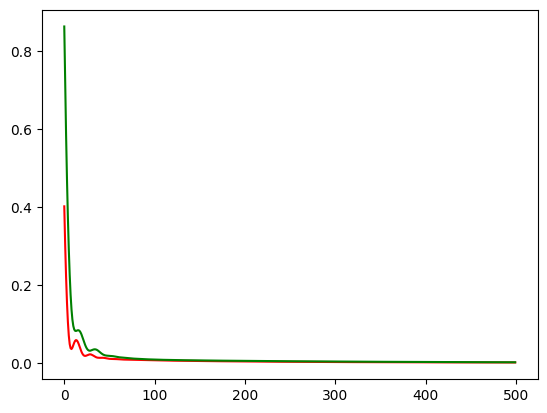

In [ ]:
plt.plot(cost_arr1, "r-")
plt.plot(cost_arr2, "g-")


In [ ]:
avg_age = np.mean(new_data_arr, axis = 0)[0]
avg_age2 = np.mean(completed_data, axis = 0)[0]

In [ ]:
np.sum((((model1(ts_data_x)-ts_data_y)*avg_age).detach().numpy())**2)/len(ts_data_y)

14.108383212694877

In [ ]:
np.std(ts_data_y.detach().numpy()*avg_age)

9.018915

In [ ]:
((model1(ts_data_x)-ts_data_y)*avg_age)

tensor([[-1.0137e+00],
        [-2.6894e+00],
        [ 2.9077e+00],
        [-5.9294e-01],
        [ 1.4001e+00],
        [-2.3471e+00],
        [-2.9662e+00],
        [ 2.2699e+00],
        [ 2.7761e+00],
        [ 1.1993e+00],
        [-4.1114e+00],
        [-3.3049e-01],
        [-6.6381e-01],
        [ 2.3513e+00],
        [-5.6775e+00],
        [ 4.1986e+00],
        [-4.7193e+00],
        [-8.1389e+00],
        [ 1.0567e+00],
        [-4.2465e+00],
        [-1.6366e+00],
        [ 2.3438e+00],
        [ 1.5848e+00],
        [-1.9720e+00],
        [ 9.1347e-02],
        [ 7.0172e+00],
        [ 6.2321e+00],
        [-7.7230e-01],
        [ 6.6413e-01],
        [ 4.3883e+00],
        [-1.5489e+00],
        [ 3.3613e-01],
        [ 3.1082e-01],
        [-2.6504e+00],
        [-1.3494e+00],
        [-4.8906e+00],
        [ 1.2906e-01],
        [ 2.2113e+00],
        [-6.3675e+00],
        [ 2.5536e-02],
        [-4.0022e-01],
        [ 2.3094e+00],
        [-3.1576e+00],
        [ 3

In [ ]:
model(ts_data_x)

tensor([[0.9350],
        [0.8284],
        [0.9668],
        [0.9377],
        [0.9511],
        [1.0101],
        [0.8217],
        [0.9349],
        [1.1083],
        [1.0980],
        [1.0083],
        [1.0292],
        [0.8035],
        [0.9878],
        [1.0863],
        [0.6529],
        [1.0409],
        [1.1408],
        [0.6709],
        [1.0084],
        [1.0534],
        [0.8598],
        [0.8069],
        [1.1347],
        [1.0458],
        [0.8581],
        [0.8782],
        [0.9381],
        [1.0567],
        [0.9912],
        [1.0682],
        [1.0861],
        [1.0376],
        [0.8475],
        [1.0384],
        [1.0014],
        [0.8506],
        [1.1096],
        [1.1504],
        [1.0308],
        [1.0988],
        [1.1630],
        [1.0013],
        [0.8391],
        [1.0322],
        [0.9486],
        [1.0273],
        [0.8222],
        [0.7570],
        [0.8619],
        [0.8901],
        [1.0957],
        [1.0154],
        [1.0484],
        [1.1288],
        [1

Sunum
Ali

1.   Paper ne yapıyor? (2-3 slide)
2.   Bizim dataset ne? (2 slide)
3.   Hangi modelleri kullanıyoruz (1 Slide)
4.   NN (Niye NN basit, BNN ile karşılaştırmak için, makalede öyle olduğu için) (1-2 Slide) 


Ata
5.  BNN (Makalede o şekilde. Variational Inference Anlatılacak) (2-3 Slide)
6.  Fourier Analysis (Feature selection gibi) (1 slide)
7.  Results-Comparison, why BNN is better? (3-4 Slide)
8.  Most Relevant feature (1-2 slide)